<a href="https://colab.research.google.com/github/guptapallavi30/ScalableML_1/blob/exploration/PhishingLinkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

# Upload your Kaggle API key file to "/content/kaggle/kaggle.json"
# Replace "/content/kaggle/kaggle.json" with the path where you placed your Kaggle API key file in Colab.
!mkdir -p ~/.kaggle
!cp "../content/kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Download the dataset
import pandas as pd

# Replace "narendrageek/my-dear-watson-translated-text" with the dataset name you want to use.
!kaggle datasets download -d shashwatwork/phishing-dataset-for-machine-learning -p /content

  0% 0.00/234k [00:00<?, ?B/s]
100% 234k/234k [00:00<00:00, 75.7MB/s]


In [3]:
# Unzip the downloaded dataset (if necessary).
import zipfile
with zipfile.ZipFile("/content/phishing-dataset-for-machine-learning.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

In [4]:

# Read the dataset into a pandas DataFrame.
df = pd.read_csv("/content/Phishing_Legitimate_full.csv")

In [5]:
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [6]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [7]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())

id
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: id, Length: 10000, dtype: int64
NumDots
2     4053
3     2723
1     1959
4      795
5      239
6      100
7       49
8       26
15      10
9       10
14       9
11       8
12       6
10       6
13       4
16       2
21       1
Name: NumDots, dtype: int64
SubdomainLevel
0     4835
1     4790
2      272
4       30
6       26
3       22
7        7
5        6
8        5
9        3
11       2
14       1
10       1
Name: SubdomainLevel, dtype: int64
PathLevel
3     2485
2     2445
4     1618
5     1261
1      882
6      464
0      335
7      226
8      130
9       79
10      29
11      16
14      10
12       8
13       5
15       3
18       3
16       1
Name: PathLevel, dtype: int64
UrlLength
48     192
57     192
47     189
60     189
59     182
      ... 
224      1
229      1
228      1
251      1
185      1
Name: UrlLength, Length: 226, dtype: int64
NumDash
0 

In [8]:
print(df.HttpsInHostname.value_counts())
print(len(df.id.value_counts()))

0    10000
Name: HttpsInHostname, dtype: int64
10000


HttpsInHostname has all 0s.

id is all unique.

In [9]:
# Remove column name 'HttpsInHostname' and 'id'
df.drop(['HttpsInHostname', 'id'], axis=1, inplace=True)

In [10]:
class_label_column = df['CLASS_LABEL']
df.drop(['CLASS_LABEL'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0
EmbeddedBrandName                     0


In [12]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Need to compare: df plain values, squared values of those values whose range is greater than 3. (squaring -1,0,1 will not change its values)

In [14]:
# Correlation graphs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
multiple_values_df = df
for i in df.columns:
  if len(df[i].unique()) <= 3:
    multiple_values_df.drop([i], axis=1, inplace=True)

In [16]:
multiple_values_df.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumAmpersand', 'NumNumericChars',
       'HostnameLength', 'PathLength', 'QueryLength', 'NumSensitiveWords',
       'PctExtHyperlinks', 'PctExtResourceUrls',
       'PctNullSelfRedirectHyperlinks'],
      dtype='object')

In [22]:
# Combine all dfs together for correlation matrices
squared_df = multiple_values_df ** 2
squared_df.columns = squared_df.columns.to_list()
squared_df.columns = pd.Index([col + '_sq' for col in squared_df.columns])
df_all = pd.concat([df, squared_df], axis=1)

In [23]:
df_all

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,...,NumQueryComponents_sq,NumAmpersand_sq,NumNumericChars_sq,HostnameLength_sq,PathLength_sq,QueryLength_sq,NumSensitiveWords_sq,PctExtHyperlinks_sq,PctExtResourceUrls_sq,PctNullSelfRedirectHyperlinks_sq
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,441,1936,0,0,0.000000,0.062500,0.000000
1,3,1,3,144,0,0,2,0,2,1,...,4,1,1681,289,256,10609,1,0.000000,0.000000,0.000000
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,729,576,0,0,0.140625,1.000000,0.000000
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,484,2500,0,0,1.000000,0.009070,0.000000
4,3,0,4,46,0,0,0,0,0,0,...,0,0,4,100,841,0,0,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,2,1,...,4,1,81,225,100,289,0,0.009365,0.573265,0.000000
9996,2,1,4,59,1,0,0,0,0,0,...,0,0,0,361,1089,0,0,0.026015,0.076100,0.016649
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,36,256,1156,0,0,0.004959,0.250000,0.003174
9998,3,1,1,49,0,0,0,0,1,0,...,1,0,9,225,169,169,0,0.027778,0.183673,0.000000


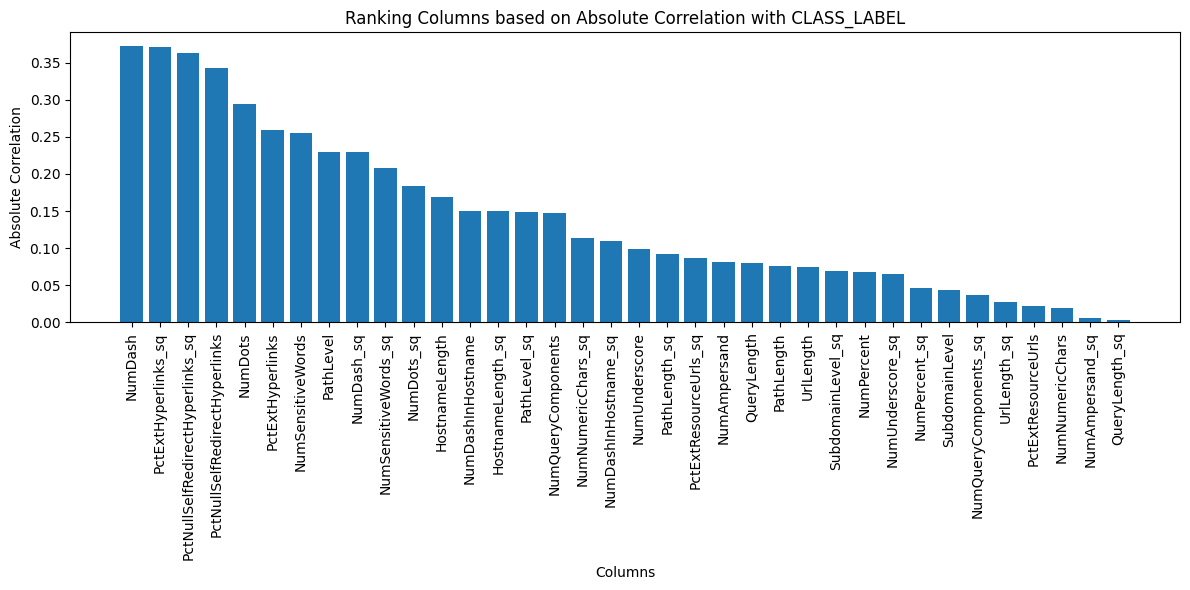

In [24]:
# Step 1: Create correlation matrices
correlation_matrix_df = pd.concat([df_all, class_label_column], axis=1).corr()

# Step 2: Extract correlation values for each dataset
col_corrs_df = correlation_matrix_df['CLASS_LABEL'].drop('CLASS_LABEL')

# Convert the Series to a DataFrame and assign the column name
col_corrs_df = col_corrs_df.to_frame(name='df_all_correlation')

# Step 3: Plot col_corrs_df in a histogram
plt.figure(figsize=(12, 6))
col_corrs_df['abs_correlation'] = np.abs(col_corrs_df).mean(axis=1)
col_corrs_df_sorted = col_corrs_df.sort_values(by='abs_correlation', ascending=False)
col_corrs_df_sorted = col_corrs_df_sorted
plt.bar(col_corrs_df_sorted.index, col_corrs_df_sorted['abs_correlation'])
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Absolute Correlation')
plt.title('Ranking Columns based on Absolute Correlation with CLASS_LABEL')
plt.tight_layout()
plt.show()

In [ ]:
# We will use df_all as input for our model

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df_all, class_label_column, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 36), (2000, 36), (8000,), (2000,))

In [28]:
# Create the neural network model
model = Sequential([
    Dense(50, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(50, activation='sigmoid'),
    Dense(50, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])

# Incremental learning with 10 batches
batch_size = len(X_train) // 10
for i in range(10):
    X_batch = X_train[i * batch_size: (i + 1) * batch_size]
    y_batch = y_train[i * batch_size: (i + 1) * batch_size]
    print(f"Training Batch {i + 1}")
    for epoch in range(1, 11):
        print(f"Epoch {epoch}/10")
        history = model.fit(X_batch, y_batch, epochs=1, verbose=0)
        if epoch % 5 == 0:
            loss, accuracy, precision = model.evaluate(X_batch, y_batch, verbose=0)
            print(f"  Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")

# Evaluate the model on the test set
loss, accuracy, precision = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)


Training Batch 1
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
  Loss: 0.6747, Accuracy: 0.6513, Precision: 0.6120
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
  Loss: 0.6487, Accuracy: 0.6500, Precision: 0.6279
Training Batch 2
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
  Loss: 0.6344, Accuracy: 0.6650, Precision: 0.6594
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
  Loss: 0.6317, Accuracy: 0.6538, Precision: 0.6176
Training Batch 3
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
  Loss: 0.6434, Accuracy: 0.6375, Precision: 0.7089
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
  Loss: 0.6265, Accuracy: 0.6662, Precision: 0.6787
Training Batch 4
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
  Loss: 0.5978, Accuracy: 0.6925, Precision: 0.6441
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
  Loss: 0.5883, Accuracy: 0.7125, Precision: 0.7346
Training Batch 5
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
